In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [6]:
!ls ../../../data

IBM_monthly.csv                         ffMonthly.pkl
Monthly_CO2_Concentrations.csv          inflation-consumer-prices-annual.csv
Superstore.xls                          mean-daily-temperature-fisher-river.csv
beerprod.dat                            or_monthly_mean_temp_1895-2019.csv
chemical-concentration-readings.csv     or_monthly_mean_temp_1895-2019.txt
coloradoflow.dat


In [8]:
dat = pd.read_csv('../../../data/IBM_monthly.csv', parse_dates=True);
dat.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-01,7.713333,7.713333,7.003334,7.226666,0.598839,8760000
1,1962-02-01,7.300000,7.480000,7.093333,7.160000,0.593315,5737600
2,1962-03-01,7.186666,7.413333,7.070000,7.103333,0.588699,5344000
3,1962-04-01,7.100000,7.100000,6.000000,6.053333,0.501678,12851200
4,1962-05-01,6.053333,6.530000,4.733333,5.233333,0.433720,49307200


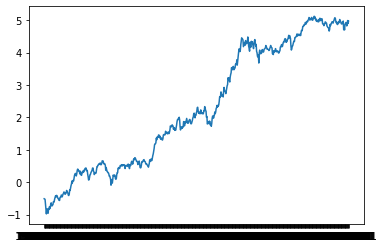

In [10]:
plt.plot(dat.Date, np.log(dat['Adj Close']));

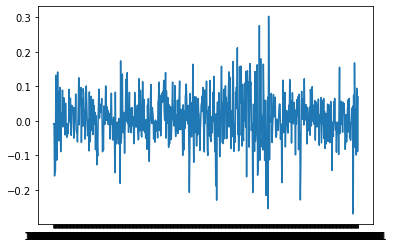

In [12]:
plt.plot(dat.Date, np.log(dat['Adj Close']).diff(1));